# Qiskit Assignment 3
## Multiple Qubits, Entanglement, and Teleportation

### Learning Objectives
1. Construct circuits with multiple qubits
2. Construct circuits with entangled states
3. Implement teleportation and understand the role of an eavesdropper

In [1]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
import random
import numpy as np
import pprint

#### Task 1 (1a, 1b) - Multiple Qubit Circuits

#### Task 1a
Run the following cell. Return a circuit from `multi_qubit_a` that produces the following target state on measurement. It's okay if your resulting state is equivalent up to a global phase. Your qubits must start in state $|00\rangle$ i.e. no initializations are allowed.

In [117]:
array_to_latex([-1j/2, 1/2, -1/2, -1j/2], pretext="\\text{Target Statevector} = ")

<IPython.core.display.Math object>

In [124]:
def multi_qubit_a():
    qc_a = QuantumCircuit(2,2)
    # BEGIN SOLUTION
    # hint: recognize the target state is tensor factorable so this is not an entangled state.
    # So we can find what states the qubits need to be in individually.
    # If we prepare |0> on qubit zero and |1> on qubit one,
    # can use outer product from lecture 01 to obtain the matrix necessary to make this transformation
    # they've practiced using the U gate in q1 assignment so can solve for the corresponding U gate parameters.
    #
    
    # primary solution - U gate
    phi = 3*np.pi/2
    theta = np.pi/2
    lamda = np.pi/2
    qc_a.u(phi,theta,lamda,0)
    qc_a.u(phi,theta,lamda,1)
    qc_a.x(1)
#     alternate solution - P, H, and X gates
#     qc_a.h(0)
#     qc_a.p(3*np.pi/2,0)
#     qc_a.h(1)
#     qc_a.p(3*np.pi/2,1)
#     qc_a.x(1)

    qc_a.measure(0,0)
    qc_a.measure(1,1)
    # END SOLUTION
    return qc_a


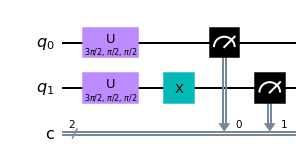

In [125]:
multi_qubit_a().draw(output='mpl')

**Recall**: Qiskit uses a little endian convention for qubit ordering that is different from what is found in many textbooks and the lecture slides. Since we're working with the statevector simulator, we can use the Statevector class' [`reverse_qargs()`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.reverse_qargs.html#qiskit-quantum-info-statevector-reverse-qargs) method to display the state on measurement of your multi-qubit circuit in big endian notation.

In [133]:
qc = multi_qubit_a()
qc.remove_final_measurements()
ket = Statevector.from_instruction(qc).reverse_qargs()
array_to_latex(ket, pretext="\\text{Circuit Statevector} = ")

<IPython.core.display.Math object>

In [127]:
def testNoInitializations_1a():
    ops = multi_qubit_a().count_ops()
    return not 'initialize' in ops
    
testNoInitializations_1a()

True

In [128]:
def testMeasurements_1a():
    ops = multi_qubit_a().count_ops()
    return 'measure' in ops and ops['measure'] == 2

testMeasurements_1a()

True

In [130]:
def testAmplitudes_1a():
    return Statevector([-1j/2, 1/2, -1/2, -1j/2]).equiv(ket)

testAmplitudes_1a()

True

#### Task 2 (2A, 2B) - What's in the box?

Build a circuit that figures out what rotation is done by an oracle. 

**README**: Your solutions to 2A and 2B may **NOT** use conditional statements to dynamically pick gates according to the input or otherwise attempt to influence the oracle. In other words, the only gate that may vary between runs is the oracle, and do **NOT** use the parameter `r` in any code you write. Solutions not adhering to these guidelines will be ***severely penalized***.

#### Task 2A
The oracle promises to be **I** or **Z**. Return a circuit from `whats_in_box_a` such that 
- measurement yields either $|0\rangle$ or $|1\rangle$
- the probability of measuring each state is correlated perfectly with the gates returned by the oracle
- example: if you return $|1\rangle$ for an oracle of Z, the probability of seeing $|1\rangle$ given an oracle of I should be 0.

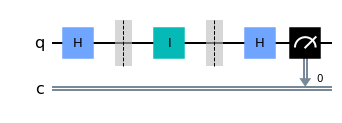

In [192]:
def oracle_a(qc, r=None):
    if r is None:
        r = random.uniform(0, 1)
    qc.i(0) if r > 0.5 else qc.z(0)
    return qc

def whats_in_box_a(r=None):
    # BEGIN SOLUTION
    qc = QuantumCircuit(1,1)
    qc.h(0)
    # END SOLUTION
    qc.barrier()
    qc = oracle_a(qc,r)
    qc.barrier()
    # BEGIN SOLUTION
    qc.h(0)
    qc.measure(0,0)
    # END SOLUTION
    return qc

whats_in_box_a().draw(output='mpl')

In [193]:
qc = whats_in_box_a()
qc.remove_final_measurements()
ket = Statevector.from_instruction(qc)
array_to_latex(ket, pretext="\\text{2A last run} = ")

<IPython.core.display.Math object>

#### Task 2b 
The oracle promises to be **I**, **X**, **Y**, or **Z**. Return a circuit from `whats_in_box_b` such that
- measurement yields either $|00\rangle$, $|01\rangle$, $|10\rangle$, or $|11\rangle$
- the probability of seeing each state is correlated perfectly with specific gates returned by the oracle
- example: if you return $|01\rangle$ for an oracle of Z, the probability of seeing $|01\rangle$ given any other gate should be 0.

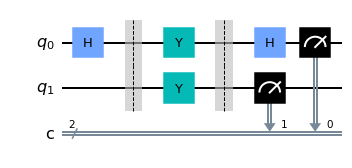

In [194]:
def oracle_b(qc, r=None):
    if r is None:
        r = random.uniform(0, 1)
    if r < 0.25:
        qc.i(0)
        qc.i(1)
    elif r < 0.5:
        qc.x(0)
        qc.x(1)
    elif r < 0.75:
        qc.y(0)
        qc.y(1)
    else:
        qc.z(0)
        qc.z(1)
    return qc

def whats_in_box_b(r=None):
    # BEGIN SOLUTION
    # hint: use I:00, X:01, Y:11, Z:10
    qc = QuantumCircuit(2,2)
    qc.h(0)
    # END SOLUTION
    qc.barrier()
    qc = oracle_b(qc,r)
    qc.barrier()
    # BEGIN SOLUTION
    qc.h(0)
    qc.measure(0,0)
    qc.measure(1,1)
    # END SOLUTION
    return qc

whats_in_box_b().draw(output='mpl')

In [195]:
qc = whats_in_box_b()
qc.remove_final_measurements()
ket = Statevector.from_instruction(qc).reverse_qargs()
array_to_latex(ket, pretext="\\text{2B last run} = ")

<IPython.core.display.Math object>

In [196]:
def testValidateRulesA():
    qc_z = whats_in_box_a(0)
    qc_i = whats_in_box_a(1)
    ops_z = qc_z.count_ops()
    ops_i = qc_i.count_ops()
    if abs(len(ops_z) - len(ops_i)) > 1:
        return False
    for (k, v) in ops_z.items():
        if k in ops_i:
            if v != ops_i[k]:
                if abs(ops_i[k] - v) > 0 and (k != 'z' and k != 'i'):
                    return False
    try:
        nz = ops_i['z']
    except KeyError:
        nz = 0
    try:
        ni = ops_z['id']
    except KeyError:
        ni = 0
    return ops_i['id'] - ni == 1 and ops_z['z'] - nz == 1
    
testValidateRulesA()

True

In [198]:
def testZOracleA():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_a(0)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = counts['0'] if '0' in counts else counts['1']
    return len(counts) == 1 and res == shots and testValidateRulesA()

testZOracleA()

True

In [199]:
def testIOracleA():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_a(1)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = counts['0'] if '0' in counts else counts['1']
    return len(counts) == 1 and res == shots and testValidateRulesA()

testIOracleA()

True

In [200]:
def testMixedOracleA():
    passing_both = all([testZOracleA() and testIOracleA() for i in range(10)])
    if not passing_both:
        return False
    shots = 100
    sim = BasicAer.get_backend("qasm_simulator")
    qc_z = whats_in_box_a(0)
    job_z = execute(qc_z, sim, shots=shots)
    counts_z = job_z.result().get_counts()
    qc_i = whats_in_box_a(1)
    job_i = execute(qc_i, sim, shots=shots)
    counts_i = job_i.result().get_counts()
    are_different_values = ('1' in counts_z) if '0' in counts_i else ('0' in counts_z)
    return are_different_values

testMixedOracleA()

True

In [201]:
def testValidateRulesB():
    qc_i = whats_in_box_b(0)
    qc_x = whats_in_box_b(0.3)
    qc_y = whats_in_box_b(0.6)
    qc_z = whats_in_box_b(1)
    qcs = [qc_i, qc_x, qc_y, qc_z]
    gates = ['i','x','y','z']

                
    for i,a in enumerate(qcs):
        for j,b in enumerate(qcs):
            if i == j:
                continue
            elif abs(len(a.count_ops()) - len(b.count_ops())) > 1:
                return False
            for ka, va in a.count_ops().items():
                if ka in b.count_ops():
                    if abs(b.count_ops()[ka] - va) > 0 and (ka != gates[i]):
                        return False
                
    return True
    
testValidateRulesB()

True

In [202]:
def testIOracleB():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_b(0)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = -1
    for state in ['00','01','10','11']:
        if state in counts:
            res = counts[state]
            break
    return len(counts) == 1 and res == shots and testValidateRulesB()

testIOracleB()

True

In [203]:
def testXOracleB():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_b(0.3)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = -1
    for state in ['00','01','10','11']:
        if state in counts:
            res = counts[state]
            break
    return len(counts) == 1 and res == shots and testValidateRulesB()

testXOracleB()

True

In [204]:
def testYOracleB():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_b(1)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = -1
    for state in ['00','01','10','11']:
        if state in counts:
            res = counts[state]
            break
    return len(counts) == 1 and res == shots and testValidateRulesB()

testYOracleB()

True

In [205]:
def testZOracleB():
    sim = BasicAer.get_backend("qasm_simulator")
    shots = 10
    qc = whats_in_box_b(1)
    job = execute(qc, sim, shots=shots)
    counts = job.result().get_counts()
    res = -1
    for state in ['00','01','10','11']:
        if state in counts:
            res = counts[state]
            break
    return len(counts) == 1 and res == shots and testValidateRulesB()

testZOracleB()

True

In [211]:
def testMixedOracleB():
    passing_all = all([
        testIOracleB() and 
        testXOracleB() and
        testYOracleB() and
        testZOracleB() 
        for i in range(3)])
    if not passing_all:
        return False
    shots = 50
    sim = BasicAer.get_backend("qasm_simulator")
    qc_i = whats_in_box_b(0)
    qc_x = whats_in_box_b(0.3)
    qc_y = whats_in_box_b(0.6)
    qc_z = whats_in_box_b(1)
    qcs = [qc_i, qc_x, qc_y, qc_z]
    states = []
    
    for i, qc in enumerate(qcs):
        job = execute(qc, sim, shots=shots)
        counts = job.result().get_counts()
        for state in ['00','01','10','11']:
            if state in counts:
                states.append(state)
                break
    # check if the states returned for each gate are unique
    return len(set(states)) == len(states)

testMixedOracleB()

True

## Conclusion
Any finals thoughts/summary go here...

### Extension Ideas
1. Solve the twin prime conjecture
2. Count down from infinity
3. etc...